In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 999

In [5]:
# read data
df = pd.read_table("scenarios/Na_study3_Sub_40_Drive_1.dat",sep="\s+",low_memory=False)

In [21]:
df

,VidTime,SimTime,FRAME_NUM,EXPERIMENT_TIME,GMT_S,GMT_MS,APPROX_DELAY,GAZE_DIR_QUAL_R,EYE_POS_R_X,EYE_POS_R_Y,EYE_POS_R_Z,GAZE_DIR_QUAL_L,EYE_POS_L_X,EYE_POS_L_Y,EYE_POS_L_Z,GAZE_DIR_QUAL,GAZE_HEADING,GAZE_PITCH,GAZE_ORIGIN_X,GAZE_ORIGIN_Y,GAZE_ORIGIN_Z,GAZE_DIRECTION_X,GAZE_DIRECTION_Y,GAZE_DIRECTION_Z,GAZE_DIRECTION_FILTERED_X,GAZE_DIRECTION_FILTERED_Y,GAZE_DIRECTION_FILTERED_Z,LEFT_GAZE_DIRECTION_X,LEFT_GAZE_DIRECTION_Y,LEFT_GAZE_DIRECTION_Z,LEFT_GAZE_DIRECTION_FILTERED_X,LEFT_GAZE_DIRECTION_FILTERED_Y,LEFT_GAZE_DIRECTION_FILTERED_Z,RIGHT_GAZE_DIRECTION_X,RIGHT_GAZE_DIRECTION_Y,RIGHT_GAZE_DIRECTION_Z,RIGHT_GAZE_DIRECTION_FILTERED_X,RIGHT_GAZE_DIRECTION_FILTERED_Y,RIGHT_GAZE_DIRECTION_FILTERED_Z,GAZE_ORIGIN_R_X,GAZE_ORIGIN_R_Y,GAZE_ORIGIN_R_Z,GAZE_ORIGIN_L_X,GAZE_ORIGIN_L_Y,GAZE_ORIGIN_L_Z,GAZE_OBJ_NAME,FILTERED_GAZE_OBJ_NAME,WORLD_INTERSECTION_X,WORLD_INTERSECTION_Y,WORLD_INTERSECTION_Z,INTERSECTION_SCREEN_X,INTERSECTION_SCREEN_Y,FILTERED_WORLD_INTERSECTION_X,FILTERED_WORLD_INTERSECTION_Y,FILTERED_WORLD_INTERSECTION_Z,FILTERED_INTERSECTION_SCREEN_X,FILTERED_INTERSECTION_SCREEN_Y,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadingError,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,TailwayDistance,TailwayTime,Velocity,LatVelocity,VertVelocity,XPos,YPos,ZPos,Roll,Pitch,Yaw,EngineRPM,SlipFR,SlipFL,SlipRR,SlipRL,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,FalseResponse,TrustResponse,EORFrameCount,Autonomous_Mode
0,0.016667,0.566644,175479,2929.870,-2147483648,0,0.787,0.598,-0.111,-0.055,1.218,0.819,-0.107,0.008,1.227,0.819,0.090,0.020,-0.097,-0.025,1.222,0.996,-0.090,0.020,0.995,-0.093,0.018,0.994,-0.112,0.011,0.994,-0.112,0.011,0.997,-0.067,0.028,0.997,-0.067,0.028,-0.098,-0.057,1.218,-0.095,0.007,1.226,Windshield,CenterChannel,4.984,-0.482,1.322,893.234,547.911,4.984,-0.502,1.315,901.087,550.640,0.289290,0.000088,0.0,0.0,4.0,179.999882,0.000002,10000.0,175330.699322,-2.0,0.029656,-5.429655,0.005702,10000.0,175330.699322,0.057027,0.000013,-0.009740,-2307.695801,194.570007,-0.526423,-0.000027,-0.049687,179.999866,497.318176,0.000000,0.000000,0.000000,0.000000,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,0.304906,0.000361,0.0,.,.,.,0.0
1,0.016667,0.649974,175485,2929.970,-2147483648,0,0.789,0.600,-0.110,-0.055,1.218,0.818,-0.107,0.008,1.226,0.818,0.085,0.020,-0.096,-0.025,1.222,0.996,-0.085,0.020,0.996,-0.093,0.017,0.994,-0.112,0.011,0.994,-0.112,0.010,0.998,-0.058,0.029,0.997,-0.067,0.027,-0.098,-0.057,1.218,-0.095,0.007,1.226,Windshield,CenterChannel,4.984,-0.460,1.323,884.279,547.608,4.984,-0.501,1.310,900.618,552.695,0.292074,0.000140,0.0,0.0,4.0,179.999923,0.000003,10000.0,129823.601541,-2.0,0.029656,-5.429655,0.007089,10000.0,129823.601541,0.082337,0.000023,-0.017198,-2307.701660,194.570007,-0.527732,-0.000040,-0.047619,179.999907,477.478912,0.000000,0.000000,0.000000,0.000000,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,-0.136027,0.001501,0.0,.,.,.,0.0
2,0.033367,0.666640,175486,2929.987,-2147483648,0,0.787,0.637,-0.111,-0.055,1.218,0.783,-0.107,0.008,1.227,0.783,0.092,0.024,-0.097,-0.025,1.222,0.995,-0.092,0.024,0.996,-0.092,0.018,0.993,-0.120,0.015,0.994,-0.112,0.011,0.997,-0.063,0.033,0.997,-0.067,0.028,-0.098,-0.057,1.218,-0.095,0.006,1.226,Windshield,CenterChannel,4.984,-0.494,1.345,897.813,538.909,4.984,-0.494,1.315,898.082,550.625,0.288541,0.000147,0.0,0.0,4.0,179.999937,0.000003,10000.0,114897.151526,-2.0,0.029656,-5.429655,0.007365,10000.0,114897.151526,0.087022,0.000025,-0.016252,-2307.702881,194.570007,-0.527992,-0.000043,-0.044206,179.999920,477.478912,0.000000,0.000000,0.000000,0.000000,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,-0.250003,-0.000064,0.0,.,.,.,0.0
3,0.050033,0.683306,175487,2930.004,-2147483648,0,0.786,0.607,-0.111,-0.055,1.218,0.824,-0.107,0.008,1.226,0.824,0.083,0.020,-0.097,-0.025,1.222,0.996,-0.082,0.020,0.996,-0.093,0.018,0.994,-0.106,0.012,0.994,-0.112,0.011,0.99

In [9]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

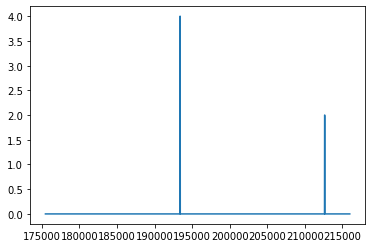

In [10]:
sces = df['User13']
times = df['FRAME_NUM']
plt.plot(times,sces)

In [11]:
# automation mode change from 0 to 1
end_point = df[df['User13'].diff()<=-1]
end_point = list(end_point['FRAME_NUM'])
end_point  

[193410, 212647]

In [12]:
# automation mode change from 1 to 0
tor_point = df[df['User13'].diff()>=1]
tor_point = list(tor_point['FRAME_NUM'])
tor_point

[193377, 212615]

In [13]:
# get the takeover period lists
takeover_list = []
for i in range(len(tor_point)):
    takeover_list.append([tor_point[i],end_point[i]])
takeover_list

[[193377, 193410], [212615, 212647]]

In [14]:
class SingleTakeover():
    def __init__(self,data,frames):
        self.start_frame = frames[0]
        self.end_frame = frames[1]
        self.frames = data[(data['FRAME_NUM']<=self.end_frame) & (data['FRAME_NUM']>=self.start_frame)] 
        self.tor_time = self.get_time_by_frameid(self.start_frame)
        self.aut_time = self.get_time_by_frameid(self.end_frame)
        self.headdistance = self.frames['HeadwayDistance']
        self.long_speed_arr = self.frames['Velocity']
        self.lat_speed_arr = self.frames['LatVelocity']
        self.steer_arr = self.frames['Steer']
        self.long_acc = self.frames['LonAccel']
        self.lat_acc = self.frames['LatAccel']
        self.headtime = self.frames['HeadwayTime']
        self.bicycle_velocity = self.frames['User7']
        self.bicycle_x = self.frames['User8']
        self.bicycle_y = self.frames['User9']
        self.car_velocity = self.frames['User10']
        self.car_x = self.frames['User11']
        self.car_y = self.frames['User12']
        self.x = self.frames['XPos']
        self.y = self.frames['YPos']
        
    def get_time_by_frameid(self,fid):
        return self.frames[self.frames['FRAME_NUM']==fid]['VidTime'].values[0]
    def get_time_by_endframe(self,fid):
        return self.get_time_by_frameid(fid) - self.tor_time       
    def calculate_tot_time(self):
        try:
            btot = self.frames[self.frames['Brake'].gt(9.9)]['VidTime'].values[0]
        except:
            btot = self.aut_time
        try:
            stot = self.frames[self.frames['Steer'].abs().gt(0.034889)]['VidTime'].values[0]
        except:
            stot = self.aut_time 
        try:
            gtot = self.frames[self.frames['Throttle'].gt(0.9)]['VidTime'].values[0]
        except:
            gtot = self.aut_time 
        btot = btot - self.tor_time
        stot = stot - self.tor_time
        gtot = gtot - self.tor_time
        return {'brake_tot':btot, 'steer_tot':stot, 'gas_tot':gtot,'min_tot':min(btot,stot,gtot)}

In [15]:
# scenario: 0
tt = SingleTakeover(df,takeover_list[1])

In [20]:
tt.frames

,VidTime,SimTime,FRAME_NUM,EXPERIMENT_TIME,GMT_S,GMT_MS,APPROX_DELAY,GAZE_DIR_QUAL_R,EYE_POS_R_X,EYE_POS_R_Y,EYE_POS_R_Z,GAZE_DIR_QUAL_L,EYE_POS_L_X,EYE_POS_L_Y,EYE_POS_L_Z,GAZE_DIR_QUAL,GAZE_HEADING,GAZE_PITCH,GAZE_ORIGIN_X,GAZE_ORIGIN_Y,GAZE_ORIGIN_Z,GAZE_DIRECTION_X,GAZE_DIRECTION_Y,GAZE_DIRECTION_Z,GAZE_DIRECTION_FILTERED_X,GAZE_DIRECTION_FILTERED_Y,GAZE_DIRECTION_FILTERED_Z,LEFT_GAZE_DIRECTION_X,LEFT_GAZE_DIRECTION_Y,LEFT_GAZE_DIRECTION_Z,LEFT_GAZE_DIRECTION_FILTERED_X,LEFT_GAZE_DIRECTION_FILTERED_Y,LEFT_GAZE_DIRECTION_FILTERED_Z,RIGHT_GAZE_DIRECTION_X,RIGHT_GAZE_DIRECTION_Y,RIGHT_GAZE_DIRECTION_Z,RIGHT_GAZE_DIRECTION_FILTERED_X,RIGHT_GAZE_DIRECTION_FILTERED_Y,RIGHT_GAZE_DIRECTION_FILTERED_Z,GAZE_ORIGIN_R_X,GAZE_ORIGIN_R_Y,GAZE_ORIGIN_R_Z,GAZE_ORIGIN_L_X,GAZE_ORIGIN_L_Y,GAZE_ORIGIN_L_Z,GAZE_OBJ_NAME,FILTERED_GAZE_OBJ_NAME,WORLD_INTERSECTION_X,WORLD_INTERSECTION_Y,WORLD_INTERSECTION_Z,INTERSECTION_SCREEN_X,INTERSECTION_SCREEN_Y,FILTERED_WORLD_INTERSECTION_X,FILTERED_WORLD_INTERSECTION_Y,FILTERED_WORLD_INTERSECTION_Z,FILTERED_INTERSECTION_SCREEN_X,FILTERED_INTERSECTION_SCREEN_Y,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadingError,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,TailwayDistance,TailwayTime,Velocity,LatVelocity,VertVelocity,XPos,YPos,ZPos,Roll,Pitch,Yaw,EngineRPM,SlipFR,SlipFL,SlipRR,SlipRL,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,FalseResponse,TrustResponse,EORFrameCount,Autonomous_Mode
37077,618.568,606.476,212615,3548.490,-2147483648,0,0.786,0.388,-0.063,-0.075,1.206,0.532,-0.042,-0.016,1.199,0.532,0.515,-0.319,-0.042,-0.052,1.199,0.826,-0.468,-0.314,0.825,-0.464,-0.324,0.798,-0.514,-0.314,0.803,-0.500,-0.323,0.852,-0.419,-0.313,0.852,-0.413,-0.323,-0.053,-0.081,1.202,-0.032,-0.022,1.195,CenterStack,Radio,0.607,-0.419,0.952,0.119,0.087,0.604,-0.415,0.945,0.115,0.080,0.000040,0.000020,0.0,0.0,4.0,269.999997,0.000005,10000.0,666.667726,2.0,-0.000112,5.399886,0.000004,10000.0,666.667726,14.999968,0.000002,-0.016868,-4992.324219,2003.147095,-0.531329,-0.000013,-0.064427,-89.999981,1593.004395,0.005750,0.005750,0.000000,0.000000,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,2.0,2.0,0.000005,-0.000234,0.0,.,.,.,1.0
37078,618.585,606.492,212616,3548.506,-2147483648,0,0.789,0.586,-0.064,-0.075,1.207,0.264,-0.042,-0.016,1.200,0.586,0.523,-0.372,-0.043,-0.051,1.199,0.807,-0.465,-0.364,0.815,-0.452,-0.363,0.785,-0.501,-0.364,0.785,-0.501,-0.364,0.827,-0.429,-0.362,0.827,-0.429,-0.362,-0.054,-0.081,1.202,-0.032,-0.022,1.195,CenterStack,Radio,0.587,-0.415,0.915,0.115,0.046,0.588,-0.401,0.917,0.101,0.048,0.000040,0.000017,0.0,0.0,4.0,270.000004,0.000005,10000.0,666.667684,2.0,-0.000111,5.399889,0.000003,10000.0,666.667684,14.999968,0.000002,-0.016868,-4992.324219,2002.897095,-0.531329,-0.000012,-0.064427,-89.999981,1593.003784,0.005750,0.005750,0.000000,0.000000,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,2.0,2.0,-0.000008,-0.000203,0.0,.,.,.,1.0
37079,618.601,606.509,212617,3548.523,-2147483648,0,0.786,0.000,-0.065,-0.075,1.206,0.000,-0.042,-0.016,1.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.789,-0.509,-0.345,0.000,0.000,0.000,0.831,-0.438,-0.344,0.000,0.000,0.000,-0.055,-0.081,1.201,-0.033,-0.022,1.194,CenterStack,Radio,0.587,-0.415,0.915,0.115,0.046,0.588,-0.401,0.917,0.101,0.048,-0.000135,0.000154,0.0,0.0,4.0,270.000004,0.000005,10000.0,666.667684,2.0,-0.000110,5.399889,0.002947,10000.0,666.667684,14.999958,0.000009,-0.016869,-4992.324219,2002.647095,-0.531329,-0.000014,-0.064430,-89.999981,1571.516113,0.005692,0.005692,0.000000,0.000001,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,2.0,2.0,-0.015756,0.012432,0.0,.,.,.,0.0
37080,618.618,606.526,212618,3548.539,-2147483648,0,0.787,0.000,-0.066,-0.074,1.205,0.000,-0.044,-0.015,1.197,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.796,-0.515,-0.317,0.000,0.000,0.000,0.839,-0.444,-0.315,0.000,0.000,0.000,

In [15]:
headdis = np.array(tt.headdistance)
deltav = np.array(tt.long_speed_arr) - np.array(tt.bicycle_velocity)
vs = []
for v in deltav:
    if v > 0:
        vs.append(v)
    else:
        vs.append(0.0001)
velocity = np.array(vs)
minttc = min(np.divide(headdis,velocity))
minttc

666.668088891923

In [37]:
tt.calculate_tot_time()

{'brake_tot': 4.170999999999992,
 'steer_tot': 2.8700000000000045,
 'gas_tot': 4.170999999999992,
 'min_tot': 2.8700000000000045}

In [25]:
headtime = np.array(tt.headtime)
min(headtime)

666.666667

In [26]:
# second1 = 125521
# takeover1_start = 131085 - bycycle driving ahead
# takeover1_end = 131747
list(wdf[wdf['FRAME_NUM']>131085]['Steer'])

NameError: name 'wdf' is not defined

In [5]:
t1 = wdf[(wdf['FRAME_NUM']>131000) & (wdf['FRAME_NUM']<132000)]

In [98]:
t1_f = t1['FRAME_NUM']
t1_x = t1['XPos']
t1_y = t1['YPos']

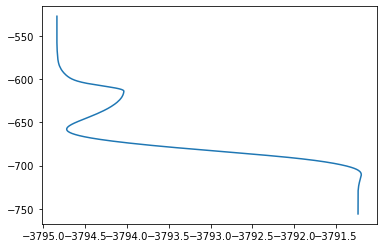

In [99]:
plt.plot(t1_x,-t1_y)

In [106]:
# second2 = 140142
# takeover1_start = 146912 - working zone ahead
# takeover1_end = 147647
t2 = wdf[(wdf['FRAME_NUM']>146012) & (wdf['FRAME_NUM']<147847)]

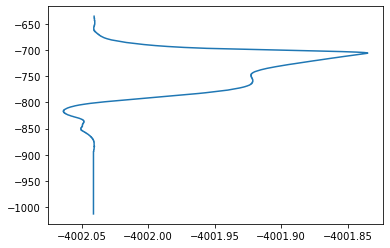

In [108]:
t2_f = t2['FRAME_NUM']
t2_x = t2['XPos']
t2_y = t2['YPos']
plt.plot(t2_x,t2_y)

In [140]:
# second2 = 152445
# takeover1_start = 157721 - stationary car ahead
# takeover1_end = 158808
t3 = wdf[(wdf['FRAME_NUM']>157500) & (wdf['FRAME_NUM']<158900)]

,VidTime,SimTime,FRAME_NUM,EXPERIMENT_TIME,GMT_S,GMT_MS,APPROX_DELAY,GAZE_DIR_QUAL_R,EYE_POS_R_X,EYE_POS_R_Y,EYE_POS_R_Z,GAZE_DIR_QUAL_L,EYE_POS_L_X,EYE_POS_L_Y,EYE_POS_L_Z,GAZE_DIR_QUAL,GAZE_HEADING,GAZE_PITCH,GAZE_ORIGIN_X,GAZE_ORIGIN_Y,GAZE_ORIGIN_Z,GAZE_DIRECTION_X,GAZE_DIRECTION_Y,GAZE_DIRECTION_Z,GAZE_DIRECTION_FILTERED_X,GAZE_DIRECTION_FILTERED_Y,GAZE_DIRECTION_FILTERED_Z,LEFT_GAZE_DIRECTION_X,LEFT_GAZE_DIRECTION_Y,LEFT_GAZE_DIRECTION_Z,LEFT_GAZE_DIRECTION_FILTERED_X,LEFT_GAZE_DIRECTION_FILTERED_Y,LEFT_GAZE_DIRECTION_FILTERED_Z,RIGHT_GAZE_DIRECTION_X,RIGHT_GAZE_DIRECTION_Y,RIGHT_GAZE_DIRECTION_Z,RIGHT_GAZE_DIRECTION_FILTERED_X,RIGHT_GAZE_DIRECTION_FILTERED_Y,RIGHT_GAZE_DIRECTION_FILTERED_Z,GAZE_ORIGIN_R_X,GAZE_ORIGIN_R_Y,GAZE_ORIGIN_R_Z,GAZE_ORIGIN_L_X,GAZE_ORIGIN_L_Y,GAZE_ORIGIN_L_Z,GAZE_OBJ_NAME,FILTERED_GAZE_OBJ_NAME,WORLD_INTERSECTION_X,WORLD_INTERSECTION_Y,WORLD_INTERSECTION_Z,INTERSECTION_SCREEN_X,INTERSECTION_SCREEN_Y,FILTERED_WORLD_INTERSECTION_X,FILTERED_WORLD_INTERSECTION_Y,FILTERED_WORLD_INTERSECTION_Z,FILTERED_INTERSECTION_SCREEN_X,FILTERED_INTERSECTION_SCREEN_Y,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadingError,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,TailwayDistance,TailwayTime,Velocity,LatVelocity,VertVelocity,XPos,YPos,ZPos,Roll,Pitch,Yaw,EngineRPM,SlipFR,SlipFL,SlipRR,SlipRL,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,FalseResponse,TrustResponse,EORFrameCount,Autonomous_Mode
43147,719.836,689.006,157502,2630.576,-2147483648,0,0.737,0.000,0.011,-0.075,1.188,0.000,-0.045,-0.036,1.159,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.791,0.451,-0.414,0.000,0.000,0.000,0.842,0.355,-0.405,0.000,0.000,0.000,0.021,-0.071,1.182,-0.035,-0.030,1.153,Windshield,RightCenter,3.971,-2.964,1.634,628.667,423.310,3.971,-2.964,1.634,628.667,423.310,0.000001,-0.000000,0.0,0.0,4.0,90.000003,0.000002,10000.0,666.666667,-2.0,-0.000010,-5.399989,-0.000000,10000.0,666.666667,14.999990,0.000000,-0.016869,-4001.949951,1233.857666,-0.531406,0.000000,-0.064434,89.999988,1592.986572,0.005749,0.005749,0.000000,0.000000,.,.,.,.,.,.,0.0,100000.0,100000.0,0.0,10000.0,10000.0,0.0,3.0,0.000021,0.000000,0.0,.,.,.,1.0
43148,719.852,689.022,157504,2630.609,-2147483648,0,0.722,0.000,-0.049,-0.026,1.154,0.004,0.018,-0.016,1.187,0.004,0.240,0.038,0.030,-0.018,1.187,0.971,-0.238,0.038,0.971,-0.238,0.038,0.971,-0.238,0.038,0.971,-0.238,0.038,0.969,-0.242,0.056,0.000,0.000,0.000,-0.037,-0.030,1.154,0.030,-0.018,1.187,Windshield,CenterChannel,4.981,-1.232,1.381,1192.083,524.210,4.981,-1.232,1.381,1192.083,524.210,0.000001,-0.000000,0.0,0.0,4.0,90.000003,0.000002,10000.0,666.666667,-2.0,-0.000009,-5.399990,-0.000000,10000.0,666.666667,14.999990,0.000000,-0.016869,-4001.949951,1234.107666,-0.531406,0.000000,-0.064434,89.999988,1592.986450,0.005749,0.005749,0.000000,0.000000,.,.,.,.,.,.,0.0,100000.0,100000.0,0.0,10000.0,10000.0,0.0,3.0,0.000011,0.000000,0.0,.,.,.,1.0
43149,719.869,689.039,157506,2630.643,-2147483648,0,0.703,0.000,-0.046,-0.023,1.159,0.126,0.018,-0.022,1.195,0.126,0.396,-0.344,0.029,-0.026,1.190,0.868,-0.363,-0.338,0.868,-0.363,-0.338,0.868,-0.363,-0.338,0.868,-0.363,-0.338,0.798,-0.505,-0.330,0.000,0.000,0.000,-0.037,-0.029,1.154,0.029,-0.026,1.190,Windshield,CenterChannel,4.981,-1.232,1.381,1192.083,524.210,4.981,-1.232,1.381,1192.083,524.210,0.000001,-0.000000,0.0,0.0,4.0,90.000003,0.000002,10000.0,666.666667,-2.0,-0.000009,-5.399990,-0.000000,10000.0,666.666667,14.999990,0.000000,-0.016869,-4001.949951,1234.357666,-0.531406,0.000000,-0.064434,89.999988,1592.986450,0.005749,0.005749,0.000000,0.000000,.,.,.,.,.,.,0.0,100000.0,100000.0,0.0,10000.0,10000.0,0.0,3.0,0.000005,0.000000,0.0,.,.,.,1.0
43150,719.886,689.056,157508,2630.676,-2147483648,0,0.688,-0.992,0.009,-0.063,1.187,0.010,0.018,-0.022,1.194,0.010,0.454,-0.260,0.029,-0.027,1.190,0.869,-0.423,-0.257,0.009,-0.004,-0.003,0.869,-0.423,-0.257,0.869,-0.423,-0.257,

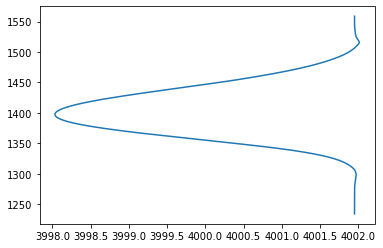

In [126]:
t3_f = t3['FRAME_NUM']
t3_x = t3['XPos']
t3_y = t3['YPos']
plt.plot(-t3_x,t3_y)

In [137]:
# second4 = 168648
# takeover1_start = 174436 - high curvature
# takeover1_end = 175846
t4 = wdf[(wdf['FRAME_NUM']>174000) & (wdf['FRAME_NUM']<175846)]

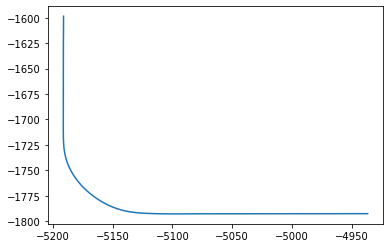

In [138]:
t4_f = t4['FRAME_NUM']
t4_x = t4['XPos']
t4_y = t4['YPos']
plt.plot(t4_x,-t4_y)